Clean the data using Python + Pandas
For the purposes of this assignment, you are NOT ALLOWED to remove rows
Before blindly looking for or replacing missing values, make sure that your data is normally distributed
Scale and transform columns as needed (hint: look into min/max scaling with sklearn preprocessing)
Replace missing values, both continuous and discrete using appropriate techniques.  
Use Python comments to provide a justification for every decision related to missing values
Make sure that numeric data is actually numeric and if it is not, fix it!
Save the resulting DataFrame as a insurance_cleaned.csv
Submit both the resulting clean data file and your Python script via CourseWeb

In [39]:
#load tools
%matplotlib inline
import numpy as np              
import pandas as pd
#sklearn to scale data
from sklearn import preprocessing as prep

In [40]:
#load file
insurance_data = pd.read_csv("insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [41]:
#describe the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1335.000000,1338.000000,1338.000000,1334.000000
mean,39.200000,30.663397,1.094918,13246.832501
std,14.040945,6.098187,1.205493,12113.712242
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4724.369462
50%,39.000000,30.400000,1.000000,9333.014350
75%,51.000000,34.693750,2.000000,16547.261587
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
#isolate numeric data
insurance_num = insurance_data[['age', 'bmi', 'children','charges']]
insurance_num.head()

,age,bmi,children,charges
0,19.0,27.900,0,16884.92400
1,18.0,33.770,1,1725.55230
2,28.0,33.000,3,4449.46200
3,33.0,22.705,0,21984.47061
4,32.0,28.880,0,3866.85520


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed496f3490>,
      dtype=object)

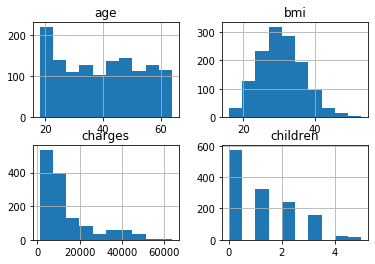

In [43]:
#generate histograms for the data
insurance_num.hist()

In [44]:
#uncomment to check graphs individually 
#insurance_num["age"].hist(bins=150)
#insurance_num["bmi"].hist(bins=150)
#insurance_num["children"].hist(bins=150)
#insurance_num["charges"].hist(bins=150)

In [45]:
#center and scale the data
scaled_data = prep.scale(insurance_num)

#remake the dataframe
scaled_insurance_num = pd.DataFrame(scaled_data,    
                           index=insurance_num.index,
                           columns=insurance_num.columns)

scaled_insurance_num.describe()

,age,bmi,children,charges
count,1.335000e+03,1.338000e+03,1.338000e+03,1.334000e+03
mean,-1.884468e-16,-1.869041e-16,2.721623e-17,-1.499717e-16
std,1.000375e+00,1.000374e+00,1.000374e+00,1.000375e+00
min,-1.510436e+00,-2.412011e+00,-9.086137e-01,-1.001304e+00
25%,-8.692130e-01,-7.164063e-01,-9.086137e-01,-7.038024e-01
50%,-1.424939e-02,-4.320880e-02,-7.876719e-02,-3.232111e-01
75%,8.407142e-01,6.611572e-01,7.510793e-01,2.725562e-01
max,1.766925e+00,3.685522e+00,3.240619e+00,4.172341e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed49623e10>,
      dtype=object)

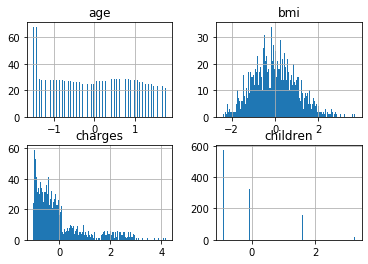

In [46]:
scaled_insurance_num.hist(bins=150)

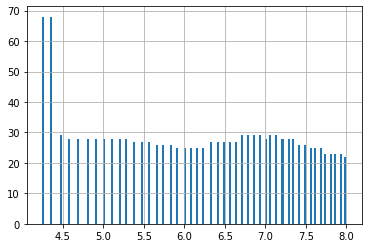

In [47]:
#try sqrt to reach normal distribution for age
#get the square root of data points
sqrt_age = insurance_num["age"].apply(np.sqrt) 

#plot histogram
sqrt_age.hist(bins=150) 

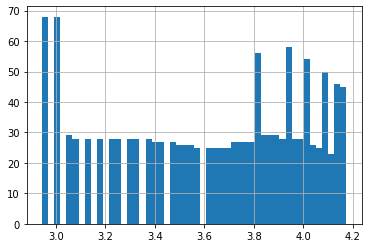

In [48]:
#try log to reach normal distribution for age
#get the log of the data
log_age = (insurance_num["age"] + 1).apply(np.log) 

#plot histogram
log_age.hist(bins=50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed3908ea10>]],
      dtype=object)

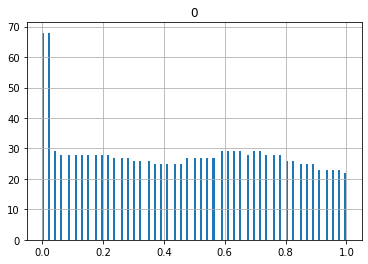

In [49]:
#try min max normalization
x = insurance_num[['age']].values.astype(float)

#minimum and maximum processor object
min_max_scaler = prep.MinMaxScaler()

#object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

#run the normalizer on the dataframe
age_normalized = pd.DataFrame(x_scaled)

age_normalized.hist(bins=150)

scaling and normalizing age does not result in much change

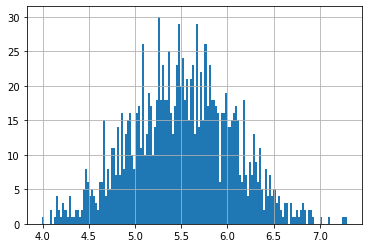

In [50]:
#try sqrt to reach normal distribution for bmi
#get the square root of data points
sqrt_bmi = insurance_num["bmi"].apply(np.sqrt) 

#plot histogram
sqrt_bmi.hist(bins=150) 

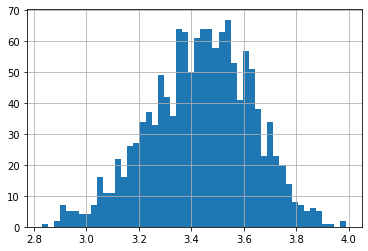

In [51]:
#try log to reach normal distribution for bmi
#get the log of the data
log_bmi = (insurance_num["bmi"] + 1).apply(np.log) 

#plot histogram
log_bmi.hist(bins=50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed4991c610>]],
      dtype=object)

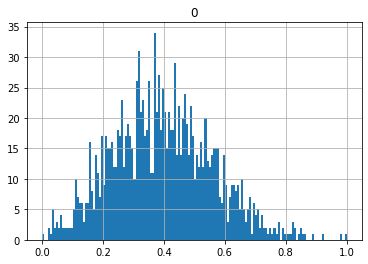

In [52]:
#try min max normalization
x = insurance_num[['bmi']].values.astype(float)

#minimum and maximum processor object
min_max_scaler = prep.MinMaxScaler()

#object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

#run the normalizer on the dataframe
bmi_normalized = pd.DataFrame(x_scaled)

bmi_normalized.hist(bins=150)

taking the sqrt or log both effectively normalize the data for bmi

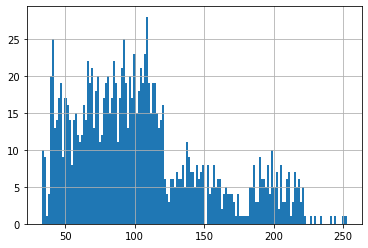

In [53]:
#try sqrt to reach normal distribution for charges
#get the square root of data points
sqrt_charges = insurance_num["charges"].apply(np.sqrt) 

#plot histogram
sqrt_charges.hist(bins=150) 

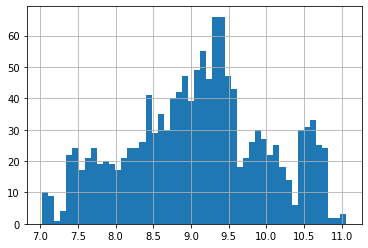

In [54]:
#try log to reach normal distribution for charges
#get the log of the data
log_charges = (insurance_num["charges"] + 1).apply(np.log) 

#plot histogram
log_charges.hist(bins=50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecf8bd0850>]],
      dtype=object)

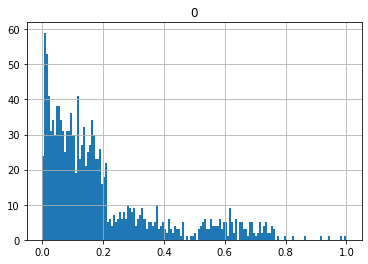

In [55]:
#try min max normalization
x = insurance_num[['charges']].values.astype(float)

#minimum and maximum processor object
min_max_scaler = prep.MinMaxScaler()

#object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

#run the normalizer on the dataframe
charges_normalized = pd.DataFrame(x_scaled)

charges_normalized.hist(bins=150)

taking the log seems to normalize the charges data better, so we'll use log_charges

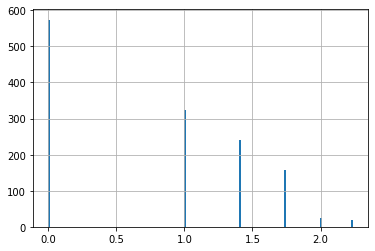

In [56]:
#try sqrt to reach normal distribution for charges
#get the square root of data points
sqrt_children = insurance_num["children"].apply(np.sqrt) 

#plot histogram
sqrt_children.hist(bins=150) 

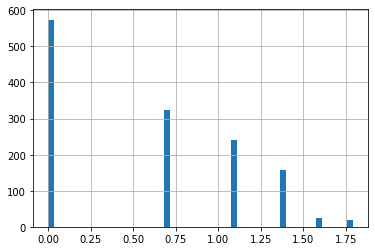

In [57]:
#try log to reach normal distribution for charges
#get the log of the data
log_children = (insurance_num["children"] + 1).apply(np.log) 

#plot histogram
log_children.hist(bins=50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed2c344390>]],
      dtype=object)

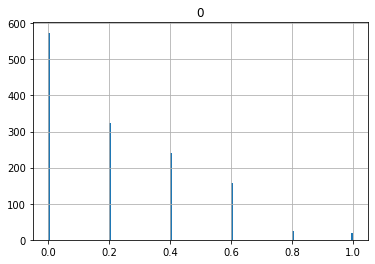

In [58]:
#try min max normalization
x = insurance_num[['children']].values.astype(float)

#minimum and maximum processor object
min_max_scaler = prep.MinMaxScaler()

#object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

#run the normalizer on the dataframe
children_normalized = pd.DataFrame(x_scaled)

children_normalized.hist(bins=150)

scaling and normalizing children does not result in much change

After visualizing the data, now we can start cleaning the columns

In [59]:
#check for null values in the columns
insurance_data.isnull().sum()

age         3
sex         3
bmi         0
children    0
smoker      0
region      5
charges     4
dtype: int64

Cleaning the age column

In [60]:
#check age column for non-numeric values
insurance_data["age"].to_frame().applymap(np.isreal)

,age
0,True
1,True
2,True
3,True
4,True
...,...
1333,True
1334,True
1335,True
1336,True


In [61]:
#age is a numeric value
#find the mean
#insurance_data["age"].mean()

#fill missing values with a mean (average) value of a given column
#insurance_data["age"].fillna(insurance_data["age"].mean(), inplace=True)

#find the median (more viable with skewed data)
insurance_data["age"].mean()

#fill missing values with a median value of a given column
insurance_data["age"].fillna(insurance_data["age"].median(), inplace=True)

Cleaning the sex column

In [62]:
#sex is a non-numeric data type
#insurance_data["sex"].value_counts()

#group by to get a list of sex and a count 
insurance_data.groupby(["sex"]).agg({'sex':'count'})

,sex
sex,
female,660
male,675


In [63]:
#"male" occurs more frequently; replace null values with the more frequently occurring value
insurance_data["sex"].fillna("male", inplace=True)

#check that the values have been recorded
insurance_data.groupby(["sex"]).agg({'sex':'count'})

,sex
sex,
female,660
male,678


Check bmi column

In [64]:
#check bmi column for non-numeric values
insurance_data["bmi"].to_frame().applymap(np.isreal)

,bmi
0,True
1,True
2,True
3,True
4,True
...,...
1333,True
1334,True
1335,True
1336,True


Cleaning the region column

In [65]:
#region is a non-numeric data type
#insurance_data["region"].value_counts()

#group by to get a list of region and a count 
insurance_data.groupby(["region"]).agg({'region':'count'})

,region
region,
northeast,324
northwest,324
southeast,362
southwest,323


In [66]:
#"southeast" occurs more frequently; replace null values with the more frequently occurring value
insurance_data["region"].fillna("southeast", inplace=True)

Cleaning the charges column

In [67]:
#check age column for non-numeric values
insurance_data["charges"].to_frame().applymap(np.isreal)

,charges
0,True
1,True
2,True
3,True
4,True
...,...
1333,True
1334,True
1335,True
1336,True


In [68]:
#charges is a numeric value
#find the mean
#insurance_data["charges"].mean()

#fill missing values with a mean (average) value of a given column
#insurance_data["charges"].fillna(insurance_data["charges"].mean(), inplace=True)

#find the median (more viable with skewed data)
insurance_data["charges"].median()

#fill missing values with a median value of a given column
insurance_data["charges"].fillna(insurance_data["charges"].median(), inplace=True)

In [69]:
#recheck for null values in the columns
insurance_data.isnull().sum()

#all null values have been replaced

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Now we can save the edited data file

In [70]:
#save data file
insurance_data.to_csv("insurance_clean.csv")